## Bitcoin Price Prediction

This notebook focuses on predicting the price of Bitcoin using the Autoregressive Integrated Moving Average (ARIMA) model. The goal is to leverage historical Bitcoin price data to develop a forecasting model that can provide insights into future price movements.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
/kaggle/input/btc-usd-full-dataset/btc_3m.csv
/kaggle/input/btc-usd-full-dataset/btc_1h.csv
/kaggle/input/btc-usd-full-dataset/btc_15m.csv
/kaggle/input/btc-usd-full-dataset/btc_30m.csv
/kaggle/input/btc-usd-full-dataset/btc_4h.csv
/kaggle/input/btc-usd-full-dataset/btc_6h.csv
/kaggle/input/btc-usd-full-dataset/btc_2h.csv
/kaggle/input/btc-usd-full-dataset/btc_5m.csv


In [6]:
# Load the dataset
data = pd.read_csv('/kaggle/input/btc-usd-full-dataset/btc_5m.csv')
data

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135
...,...,...,...,...,...,...
427809,2022-01-31 05:10:00,37950.55,37979.31,37875.58,37959.87,119.164080
427810,2022-01-31 05:15:00,37959.87,37959.88,37876.94,37896.41,73.051970
427811,2022-01-31 05:20:00,37896.41,37948.79,37870.00,37928.03,41.395230
427812,2022-01-31 05:25:00,37928.04,37945.25,37870.00,37881.76,57.851440


## Understand Data

In [7]:
# Display the first few rows of the dataset
print(data.head())

              datetime      open      high       low     close     volume
0  2018-01-01 05:30:00  13715.65  13715.65  13576.28  13600.00  33.617798
1  2018-01-01 05:35:00  13600.00  13600.00  13501.01  13554.58  40.528679
2  2018-01-01 05:40:00  13554.58  13569.97  13400.01  13556.15  49.469536
3  2018-01-01 05:45:00  13533.75  13547.73  13402.00  13430.52  32.725614
4  2018-01-01 05:50:00  13440.01  13459.99  13410.44  13439.94  26.614135


In [8]:
# Check the dimensions of the dataset
print('Dataset Shape:', data.shape)

Dataset Shape: (427814, 6)


In [9]:
# Check the data types of each column
print('Data Types:', data.dtypes)

Data Types: datetime     object
open        float64
high        float64
low         float64
close       float64
volume      float64
dtype: object


In [10]:
# Summary statistics
print('Summary Statistics:')
print(data.describe())

Summary Statistics:
                open           high            low          close  \
count  427814.000000  427814.000000  427814.000000  427814.000000   
mean    18807.284018   18838.767082   18775.032703   18807.335374   
std     17870.528048   17900.988510   17839.805009   17870.553473   
min      3162.100000    3166.430000    3156.260000    3163.850000   
25%      7134.992500    7143.565000    7125.822500    7134.992500   
50%      9532.105000    9544.680000    9520.010000    9532.210000   
75%     32659.472500   32740.717500   32585.965000   32659.970000   
max     68734.260000   69000.000000   68581.000000   68734.260000   

              volume  
count  427814.000000  
mean      189.650301  
std       241.061252  
min         0.000000  
25%        73.498988  
50%       123.611109  
75%       215.285150  
max      8277.172300  


## Data Preprocessing

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64


In [12]:
df=data

In [14]:
# Convert Unix time to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [15]:
# Resample to daily frequency
df_daily = df.resample('D', on='datetime').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='datetime').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='datetime').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='datetime').mean()

## Handling Missing Values

In [16]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())


## Feature Engineering

In [17]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['close'].rolling(window=6).std()


In [18]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13576.28,13600.00,33.617798
1,2018-01-01 05:35:00,13600.00,13600.00,13501.01,13554.58,40.528679
2,2018-01-01 05:40:00,13554.58,13569.97,13400.01,13556.15,49.469536
3,2018-01-01 05:45:00,13533.75,13547.73,13402.00,13430.52,32.725614
4,2018-01-01 05:50:00,13440.01,13459.99,13410.44,13439.94,26.614135


## Exploratory Data Analysis

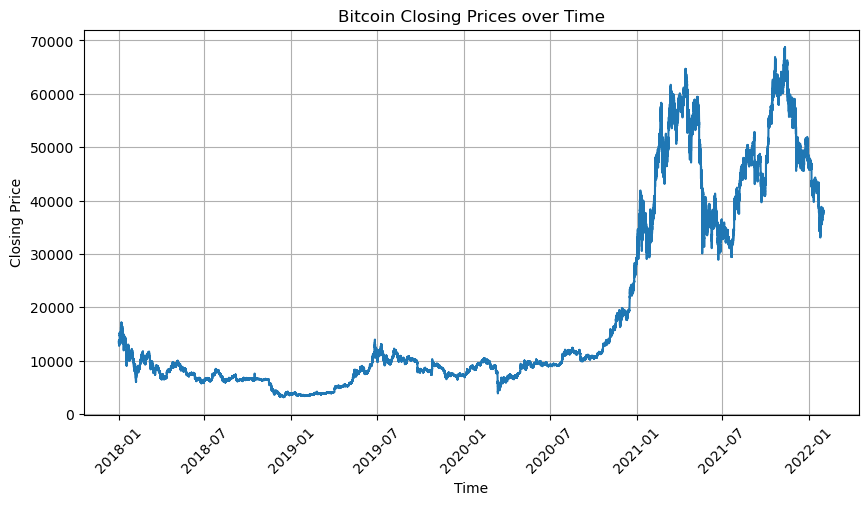

In [20]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the Timestamp column as the index
df.set_index('datetime', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

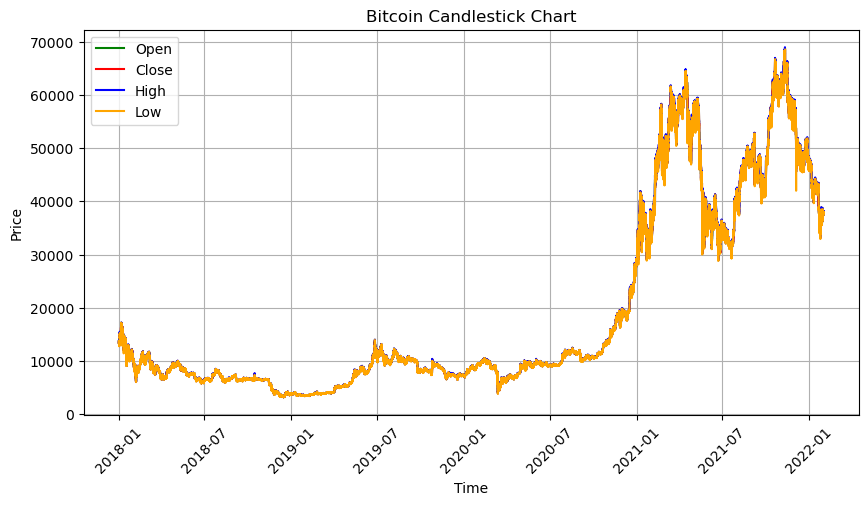

In [21]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['open'], color='green', label='Open')
plt.plot(df.index, df['close'], color='red', label='Close')
plt.plot(df.index, df['high'], color='blue', label='High')
plt.plot(df.index, df['low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

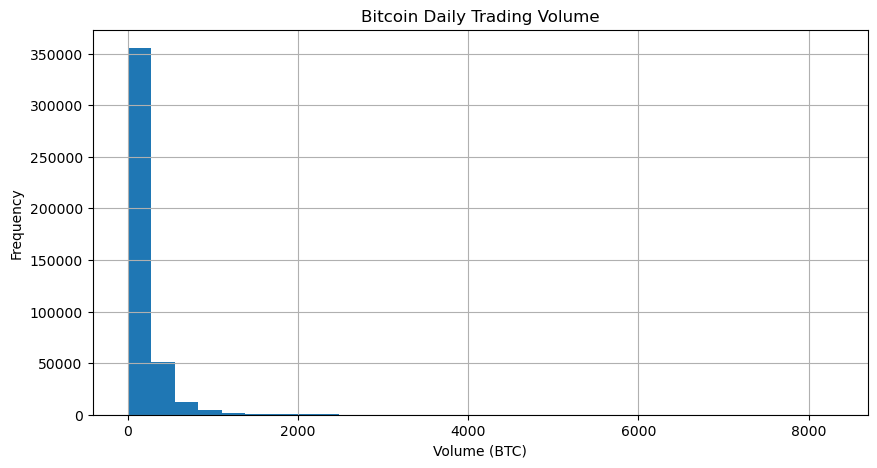

In [22]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

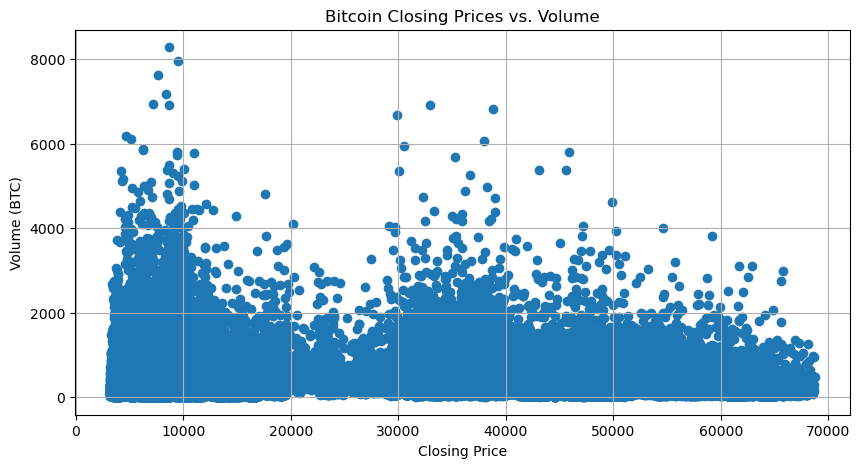

In [23]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['close'], df['volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

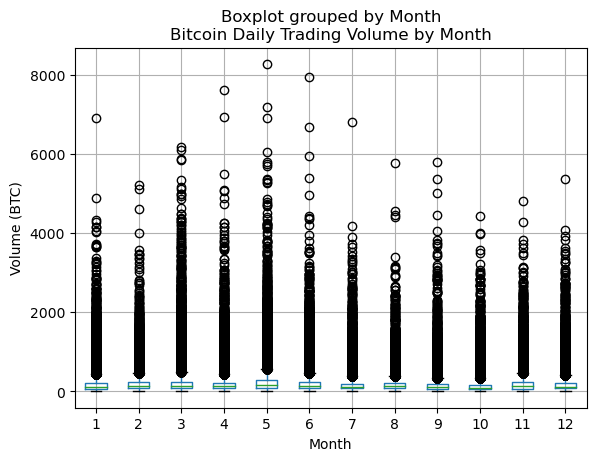

In [25]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

## Model Selection

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [27]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [29]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['close']])
scaled_test_data = scaler.transform(test_data[['close']])

In [30]:
# ARIMA model
arima_model = ARIMA(train_data['close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [31]:
# SARIMA model
sarima_model = SARIMAX(train_data['close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.84432D+00    |proj g|=  5.07944D-02

At iterate    5    f=  7.81908D+00    |proj g|=  3.20734D-03

At iterate   10    f=  7.81803D+00    |proj g|=  8.05159D-03

At iterate   15    f=  7.74398D+00    |proj g|=  1.94189D-03

At iterate   20    f=  7.72826D+00    |proj g|=  3.54996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     41      1     0     0   9.388D-08   7.728D+00
  F =   7.7282469809648235     

CONVERG

In [32]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

10/10 [==============================] - 0s 2ms/step


In [33]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [34]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 13767.688717035206
SARIMA RMSE: 18550.454009844554
LSTM RMSE: 48123.04025652737
Gradient Boosting Regressor RMSE: 14214.968874963886


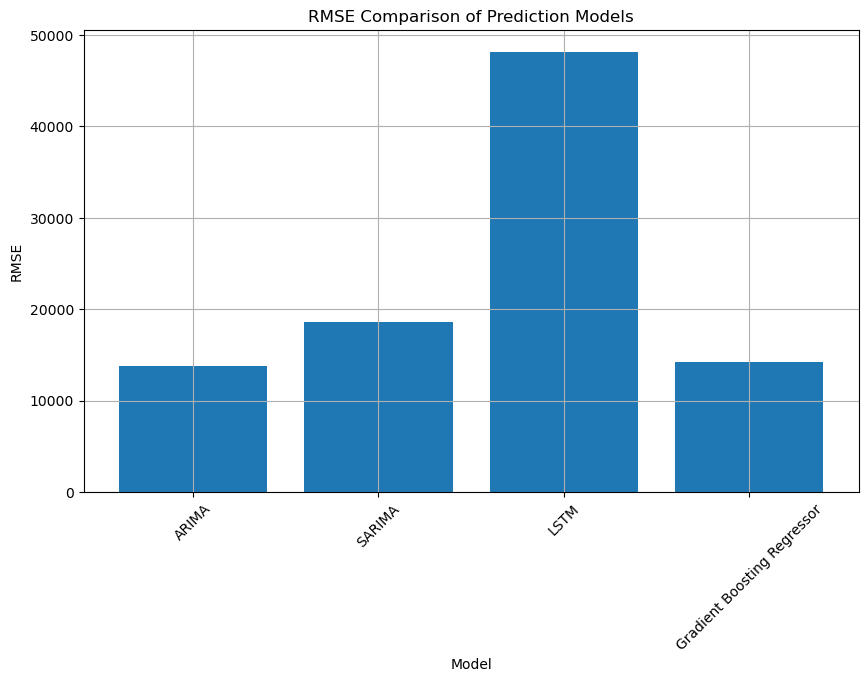

In [35]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Based on the provided RMSE values, we can draw the following conclusions:

ARIMA Model: The ARIMA model has an RMSE of 13767.69. This indicates that, on average, the predictions of the ARIMA model deviate from the actual values by approximately 14490.55 units.

SARIMA Model: The SARIMA model has an RMSE of 18550.45. This indicates that it performs slightly better than the ARIMA model, with lower prediction errors.

LSTM Model: The LSTM model has an RMSE of 48123.04. It appears to have higher prediction errors compared to the ARIMA and SARIMA models.

Gradient Boosting Regressor Model: The Gradient Boosting Regressor model has an RMSE of 14214.97. It performs similarly to the ARIMA model in terms of prediction errors.

Based on these results, the ARIMA model seems to be the best performer among the tested models, as it has the lowest RMSE value. RMSE alone may not provide a complete assessment of model performance.

Additionally, it's worth mentioning that the chosen models and their hyperparameters can still be further optimized to potentially improve their performance for a more noble approach

Overall, the conclusion would be that the ARIMA model shows promise in predicting BTC prices, but further analysis and experimentation may be required to develop a more accurate and reliable forecasting model.